<a href="https://colab.research.google.com/github/EBRO-MAN/Handwritten-digit-recognition-CNN-/blob/master/digit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Step 1: Import required packages
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import gradio as gr

In [15]:
# Step 2: Load and prepare the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to 0–1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (28, 28, 1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [16]:
# Step 3: Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
# Step 4: Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
# Step 5: Train the model
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 57s 33ms/step - accuracy: 0.8791 - loss: 0.3773 - val_accuracy: 0.9845 - val_loss: 0.0528
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9853 - loss: 0.0509 - val_accuracy: 0.9880 - val_loss: 0.0410
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9881 - loss: 0.0371 - val_accuracy: 0.9900 - val_loss: 0.0366
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9916 - loss: 0.0271 - val_accuracy: 0.9892 - val_loss: 0.0356
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9945 - loss: 0.0195 - val_accuracy: 0.9905 - val_loss: 0.0361
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 91s 38ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accuracy: 0.9927 - val_loss: 0.0290
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 55s 33ms/step - accuracy: 0.9959 - loss: 0.0123 - val_accuracy: 0.9900 - val_loss: 0.0420
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9961 -

In [19]:
# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9891 - loss: 0.0379
Test Accuracy: 0.9916999936103821


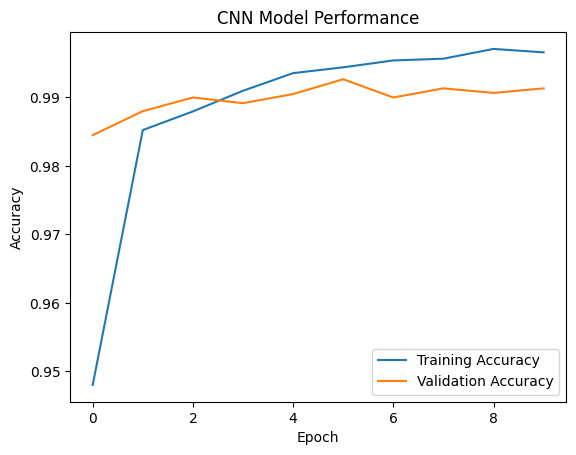

In [20]:
# Step 7: Visualize training performance
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Model Performance')
plt.show()

In [21]:
# Gradio Interface
def predict_digit(image):
    # Resize & convert to model input shape
    image = image.convert("L").resize((28,28))
    img_array = np.array(image) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)

    # Make prediction
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)

    return {str(i): float(prediction[0][i]) for i in range(10)}

interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(type="pil", label="Upload digit image"),
    outputs=gr.Label(num_top_classes=3, label="Prediction"),
    title="Handwritten Digit Recognition",
    description="Upload an image of a handwritten digit (0–9) to classify."
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4a96b70ff6a06f13a7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
